___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-3 (RNN)<br><br>Product Amount Forecast by Time<br><h1>

# Dataset Info

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

# Import Libraries

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Indest Data

In [33]:
data = pd.read_csv('Frozen_Dessert_Production.csv', index_col='DATE', parse_dates=True)

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Change the column name as "Production"
2. Plot your data and see its seasonalty

In [34]:
data.head()

,IPN31152N
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IPN31152N  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


In [36]:
data.isnull().sum()

IPN31152N    0
dtype: int64

In [37]:
data.duplicated().sum()

0

In [38]:
data.columns

Index(['IPN31152N'], dtype='object')

In [39]:
data.rename(columns={'IPN31152N':'Production'}, inplace=True)

In [40]:
data.head()

,Production
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


<AxesSubplot:xlabel='DATE'>

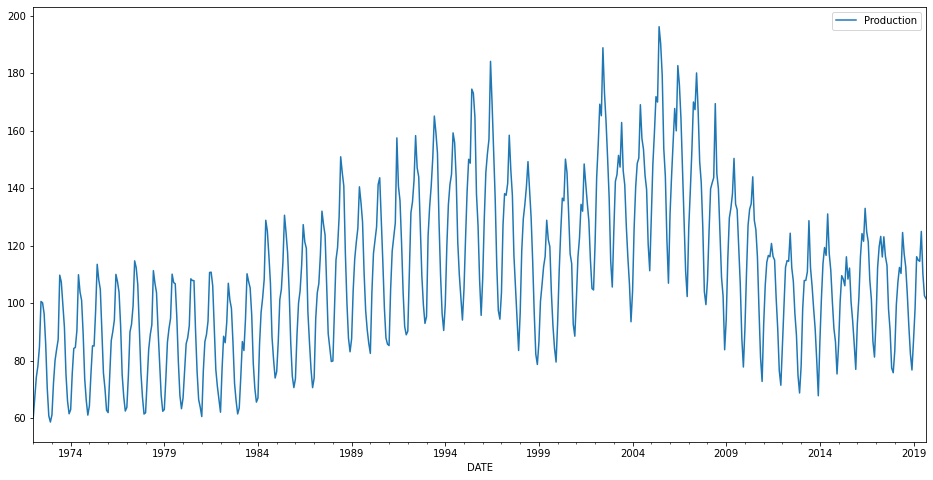

In [51]:
data.plot(figsize=(16,8))

# Preprocessing of Data

## Train Test Split

In [52]:
len(data)

573

In [53]:
test_size = 42

In [54]:
test_ind = len(data) - test_size
test_ind

531

In [55]:
train = data.iloc[:test_ind]
test = data.iloc[test_ind:]

In [56]:
train

,Production
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
...,...
2015-11-01,85.8640
2015-12-01,76.9749
2016-01-01,92.8105


In [57]:
test

,Production
DATE,
2016-04-01,124.2106
2016-05-01,121.5435
2016-06-01,132.9865
2016-07-01,124.8514
2016-08-01,121.3321
2016-09-01,108.0359
2016-10-01,101.3836
2016-11-01,86.6647
2016-12-01,81.2569


## Scaling

In [58]:
from sklearn.preprocessing import MinMaxScaler

In [59]:
scaler = MinMaxScaler()

In [60]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [61]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [62]:
length = 12
batch_size = 1
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, batch_size = batch_size)

In [63]:
len(generator)

519

In [64]:
generator[0]

(array([[[0.00947104],
         [0.06108982],
         [0.11326273],
         [0.14145625],
         [0.18982663],
         [0.30495972],
         [0.30154406],
         [0.27416065],
         [0.19736841],
         [0.08532665],
         [0.01561588],
         [0.        ]]]),
 array([[0.01774221]]))

In [65]:
X, y = generator[0]

In [66]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.00947104 0.06108982 0.11326273 0.14145625 0.18982663 0.30495972
 0.30154406 0.27416065 0.19736841 0.08532665 0.01561588 0.        ]
Predict this y: 
 [[0.01774221]]


# Modelling & Model Performance

## with "tanh" activation function

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [68]:
n_features = train_scaled.shape[1]

In [69]:
model = Sequential()
model.add(LSTM(100, activation = 'tanh', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(50, activation = 'tanh'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [70]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [83]:
from tensorflow.keras.callbacks import EarlyStopping

In [84]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

In [85]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = batch_size)

In [86]:
len(validation_generator)

30

In [87]:
model.fit(x = generator,
          epochs = 20,
          validation_data = validation_generator,
          callbacks = [early_stop])

Epoch 1/20
519/519 [==============================] - 6s 7ms/step - loss: 0.0209 - val_loss: 0.0022
Epoch 2/20
519/519 [==============================] - 3s 6ms/step - loss: 0.0049 - val_loss: 0.0028
Epoch 3/20
519/519 [==============================] - 3s 6ms/step - loss: 0.0046 - val_loss: 0.0022
Epoch 4/20
519/519 [==============================] - 3s 6ms/step - loss: 0.0040 - val_loss: 0.0034
Epoch 5/20
519/519 [==============================] - 3s 6ms/step - loss: 0.0039 - val_loss: 0.0034
Epoch 6/20
519/519 [==============================] - 3s 6ms/step - loss: 0.0040 - val_loss: 0.0055
Epoch 7/20
519/519 [==============================] - 3s 6ms/step - loss: 0.0033 - val_loss: 0.0024
Epoch 8/20
519/519 [==============================] - 3s 6ms/step - loss: 0.0033 - val_loss: 0.0030


<AxesSubplot:>

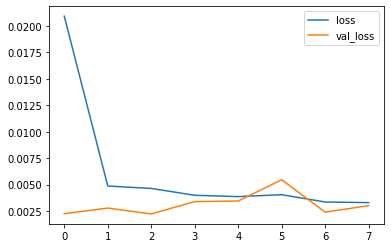

In [88]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

### Evaluation on Test Data

In [89]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [90]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [91]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    current_pred = model.predict(current_batch)    # get prediction 1 time stamp ahead
    predictions_scaled.append(current_pred[0])    # store prediction
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)    # update batch to now include prediction and drop first value

1/1 [==============================] - 0s 16ms/step


In [92]:
predictions_scaled

[array([0.35179013], dtype=float32),
 array([0.37755919], dtype=float32),
 array([0.37980935], dtype=float32),
 array([0.34921208], dtype=float32),
 array([0.30398008], dtype=float32),
 array([0.2450062], dtype=float32),
 array([0.20310435], dtype=float32),
 array([0.18639693], dtype=float32),
 array([0.19992673], dtype=float32),
 array([0.23773855], dtype=float32),
 array([0.27278516], dtype=float32),
 array([0.30369154], dtype=float32)]

In [93]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: 0.06544443553653967 
mae: 0.10023856872227709 
mse: 0.012368281069540953 
rmse: 0.11121277385957493


### Inverse Transformation and Comparing

In [94]:
predictions = scaler.inverse_transform(predictions_scaled)

In [95]:
compare = test[:12]

In [96]:
compare['Predictions_tanh'] = predictions

C:\Users\brand\AppData\Local\Temp/ipykernel_12792/4075765098.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compare['Predictions'] = predictions


In [97]:
compare

,Production,Predictions
DATE,,
2016-04-01,124.2106,107.035833
2016-05-01,121.5435,110.579436
2016-06-01,132.9865,110.888865
2016-07-01,124.8514,106.681315
2016-08-01,121.3321,100.461287
2016-09-01,108.0359,92.351559
2016-10-01,101.3836,86.589471
2016-11-01,86.6647,84.291968
2016-12-01,81.2569,86.152505


<AxesSubplot:xlabel='DATE'>

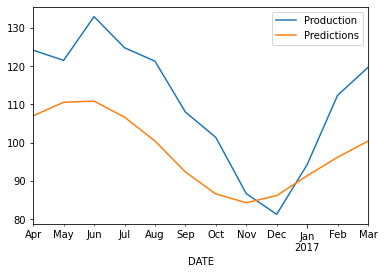

In [98]:
compare.plot()

In [99]:
eval_metrics(compare.Production, compare.Predictions_tanh)

r2_score: 0.06544443553653878 
mae: 13.78419651541835 
mse: 233.88509411507277 
rmse: 15.293302263248208


## with "relu" activation function

In [100]:
model_2 = Sequential()
model_2.add(LSTM(100, activation = 'relu', return_sequences=True, input_shape = (length, n_features)))
model_2.add(LSTM(50, activation = 'relu'))
model_2.add(Dense(1))
model_2.compile(optimizer = 'adam', loss = 'mse')

In [101]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [102]:
model_2.fit(x = generator,
          epochs = 20,
          validation_data = validation_generator,
          callbacks = [early_stop])

Epoch 1/20
519/519 [==============================] - 4s 6ms/step - loss: 0.0266 - val_loss: 0.0071
Epoch 2/20
519/519 [==============================] - 3s 5ms/step - loss: 0.0111 - val_loss: 0.0143
Epoch 3/20
519/519 [==============================] - 3s 5ms/step - loss: 0.0079 - val_loss: 0.0033
Epoch 4/20
519/519 [==============================] - 3s 5ms/step - loss: 0.0074 - val_loss: 0.0083
Epoch 5/20
519/519 [==============================] - 3s 5ms/step - loss: 0.0060 - val_loss: 0.0024
Epoch 6/20
519/519 [==============================] - 3s 5ms/step - loss: 0.0067 - val_loss: 0.0038
Epoch 7/20
519/519 [==============================] - 3s 5ms/step - loss: 0.0059 - val_loss: 0.0026
Epoch 8/20
519/519 [==============================] - 3s 5ms/step - loss: 0.0056 - val_loss: 0.0025
Epoch 9/20
519/519 [==============================] - 3s 5ms/step - loss: 0.0049 - val_loss: 0.0018
Epoch 10/20
519/519 [==============================] - 3s 5ms/step - loss: 0.0049 - val_loss: 0.0026

<AxesSubplot:>

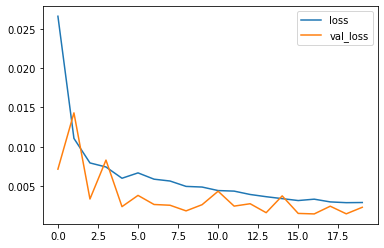

In [104]:
loss_df = pd.DataFrame(model_2.history.history)
loss_df.plot()

### Evaluation on Test Data

In [105]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [106]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    current_pred = model.predict(current_batch)    # get prediction 1 time stamp ahead
    predictions_scaled.append(current_pred[0])    # store prediction
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)    # update batch to now include prediction and drop first value

1/1 [==============================] - 0s 16ms/step


In [107]:
predictions_scaled

[array([0.35179013], dtype=float32),
 array([0.37755919], dtype=float32),
 array([0.37980935], dtype=float32),
 array([0.34921208], dtype=float32),
 array([0.30398008], dtype=float32),
 array([0.2450062], dtype=float32),
 array([0.20310435], dtype=float32),
 array([0.18639693], dtype=float32),
 array([0.19992673], dtype=float32),
 array([0.23773855], dtype=float32),
 array([0.27278516], dtype=float32),
 array([0.30369154], dtype=float32)]

In [108]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: 0.06544443553653967 
mae: 0.10023856872227709 
mse: 0.012368281069540953 
rmse: 0.11121277385957493


### Inverse Transformation and Comparing

In [109]:
predictions = scaler.inverse_transform(predictions_scaled)

In [110]:
compare = test[:12]

In [111]:
compare['Predictions_RELU'] = predictions

C:\Users\brand\AppData\Local\Temp/ipykernel_12792/1903080625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compare['Predictions_RELU'] = predictions


In [112]:
compare

,Production,Predictions_RELU
DATE,,
2016-04-01,124.2106,107.035833
2016-05-01,121.5435,110.579436
2016-06-01,132.9865,110.888865
2016-07-01,124.8514,106.681315
2016-08-01,121.3321,100.461287
2016-09-01,108.0359,92.351559
2016-10-01,101.3836,86.589471
2016-11-01,86.6647,84.291968
2016-12-01,81.2569,86.152505


<AxesSubplot:xlabel='DATE'>

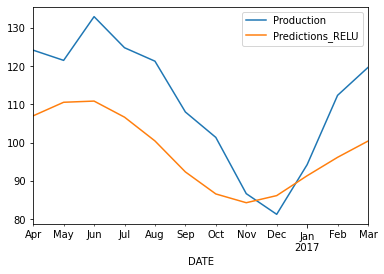

In [113]:
compare.plot()

In [114]:
eval_metrics(compare.Production, compare.Predictions_RELU)

r2_score: 0.06544443553653878 
mae: 13.78419651541835 
mse: 233.88509411507277 
rmse: 15.293302263248208


# Retrain and Forecasting

Select activation function providing a better score, create your final model with full data, forecast for the next 12 months, and plot this forecast.

In [115]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(data)

In [116]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = batch_size)

In [117]:
len(df)

573

In [118]:
len(generator)

561

In [119]:
model = Sequential()
model.add(LSTM(100, activation = 'tanh', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(50, activation = 'tanh'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

model.fit(x = generator, epochs=15)

Epoch 1/15
561/561 [==============================] - 6s 6ms/step - loss: 0.0196
Epoch 2/15
561/561 [==============================] - 3s 6ms/step - loss: 0.0052
Epoch 3/15
561/561 [==============================] - 3s 5ms/step - loss: 0.0045
Epoch 4/15
561/561 [==============================] - 3s 6ms/step - loss: 0.0045
Epoch 5/15
561/561 [==============================] - 3s 6ms/step - loss: 0.0040
Epoch 6/15
561/561 [==============================] - 3s 6ms/step - loss: 0.0034
Epoch 7/15
561/561 [==============================] - 3s 6ms/step - loss: 0.0034
Epoch 8/15
561/561 [==============================] - 3s 6ms/step - loss: 0.0037
Epoch 9/15
561/561 [==============================] - 3s 6ms/step - loss: 0.0031
Epoch 10/15
561/561 [==============================] - 3s 6ms/step - loss: 0.0031
Epoch 11/15
561/561 [==============================] - 3s 6ms/step - loss: 0.0030
Epoch 12/15
561/561 [==============================] - 3s 6ms/step - loss: 0.0027
Epoch 13/15
561/561 [====

In [120]:
scaled_full_data.shape

(573, 1)

In [121]:
scaled_full_data[-length:].shape

(12, 1)

In [122]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)
    
    # store prediction
    forecast.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

1/1 [==============================] - 0s 15ms/step


In [123]:
forecast = scaler.inverse_transform(forecast)

In [124]:
forecast

array([[ 88.91059561],
       [ 82.09122919],
       [ 83.24477539],
       [ 91.54923511],
       [101.47483308],
       [109.7987676 ],
       [116.36316651],
       [121.07358193],
       [121.50358499],
       [115.51547558],
       [105.80871099],
       [ 94.46756265]])

In [125]:
data

,Production
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
...,...
2019-05-01,114.5613
2019-06-01,124.9605
2019-07-01,110.2632


In [137]:
forecast_index = pd.date_range(start = '1972-01-01', periods = length, freq = 'MS')

In [138]:
forecast_index

DatetimeIndex(['1972-01-01', '1972-02-01', '1972-03-01', '1972-04-01',
               '1972-05-01', '1972-06-01', '1972-07-01', '1972-08-01',
               '1972-09-01', '1972-10-01', '1972-11-01', '1972-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [139]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])

In [140]:
forecast_df

,Forecast
1972-01-01,88.910596
1972-02-01,82.091229
1972-03-01,83.244775
1972-04-01,91.549235
1972-05-01,101.474833
1972-06-01,109.798768
1972-07-01,116.363167
1972-08-01,121.073582
1972-09-01,121.503585
1972-10-01,115.515476


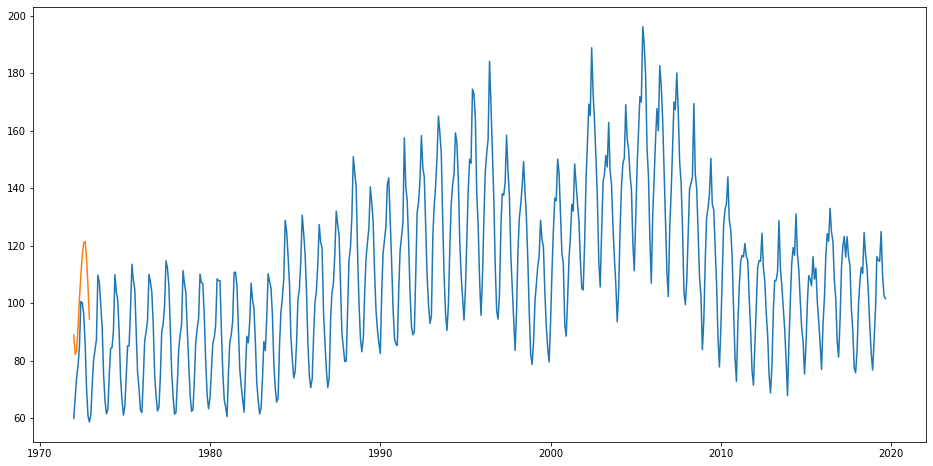

In [142]:
plt.figure(figsize = (16, 8))
plt.plot(data.index, df['Production'])
plt.plot(forecast_df.index, forecast_df['Forecast'])

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___